In [111]:
%%capture
%run final_chars_classification.ipynb



In [112]:
%run table_detector.ipynb

In [113]:
%run final_functions.ipynb

In [114]:
%run preprocessing.ipynb

In [115]:
%run get_rows_number.ipynb

./all_symbols/ 0
./all_symbols/( 70
./all_symbols/) 84
./all_symbols/+ 67
./all_symbols/A 78
./all_symbols/B 67
./all_symbols/C 79
./all_symbols/D 72
./all_symbols/E 74
./all_symbols/F 80
./all_symbols/implies 72
./all_symbols/xor 86
./all_symbols/~ 69


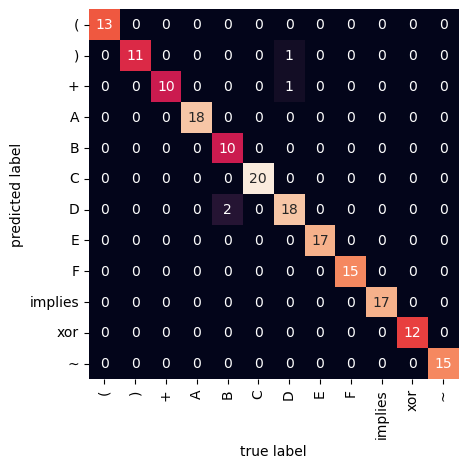

./0_1_symbols/ 0
./0_1_symbols/0 27
./0_1_symbols/1 27


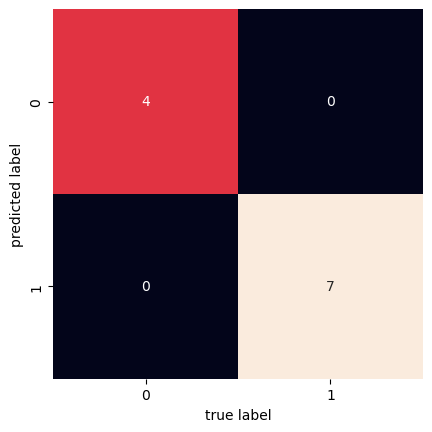

./letters_only_symbols/ 0
./letters_only_symbols/A 78
./letters_only_symbols/B 67
./letters_only_symbols/C 79
./letters_only_symbols/D 72
./letters_only_symbols/E 74
./letters_only_symbols/F 80


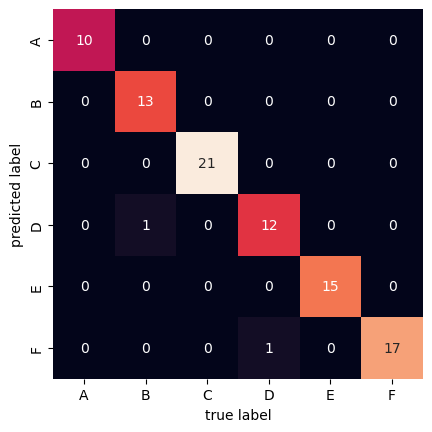

./E_F_symbols/ 0
./E_F_symbols/E 74
./E_F_symbols/F 80


c:\Users\77\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


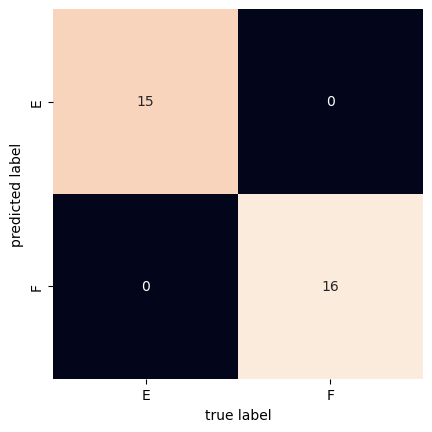

In [116]:
initialize_models(True)
# load_models()

In [117]:
from tabular import tabular

In [118]:
def solve_expression(img, is_table = False):
    
    img = cv2.resize(img, (2448, 3264)) # size of A4
    img = img.astype(np.uint8)
    img = preprocessing(img, False)
    
    show_images([img])

    if(is_table):
        # show_images([table_tany(img)])
        # table_tany(img)
        cells, col_num, row_num = box_extraction(img, showTrace= False)#, table= True)

        letters = [classify(i, is_letter=True) for i in cells[0:col_num]]
        numbers = [classify(i, is_0_1=True) for i in cells[col_num:]]
        
        numbers = [int(i) for i in numbers]
        # for l in letters:
        print(letters)
        # for l in numbers:
        print(numbers)
        #  # numbers.shape
         
        print(col_num)
        # print(numbers)
        solver = tabular.McCluskey()
        solver.solve(numbers,col_num)
        
        solver.logic()
        

    else: 

        expression_rows = get_rows_number(img)
        expressions = [classify(i, is_expression=True) for i in expression_rows ]
        # print(expression)
        return [get_table(expression) for expression in expressions]
        # return expression

    

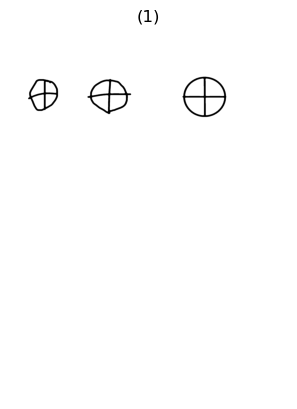

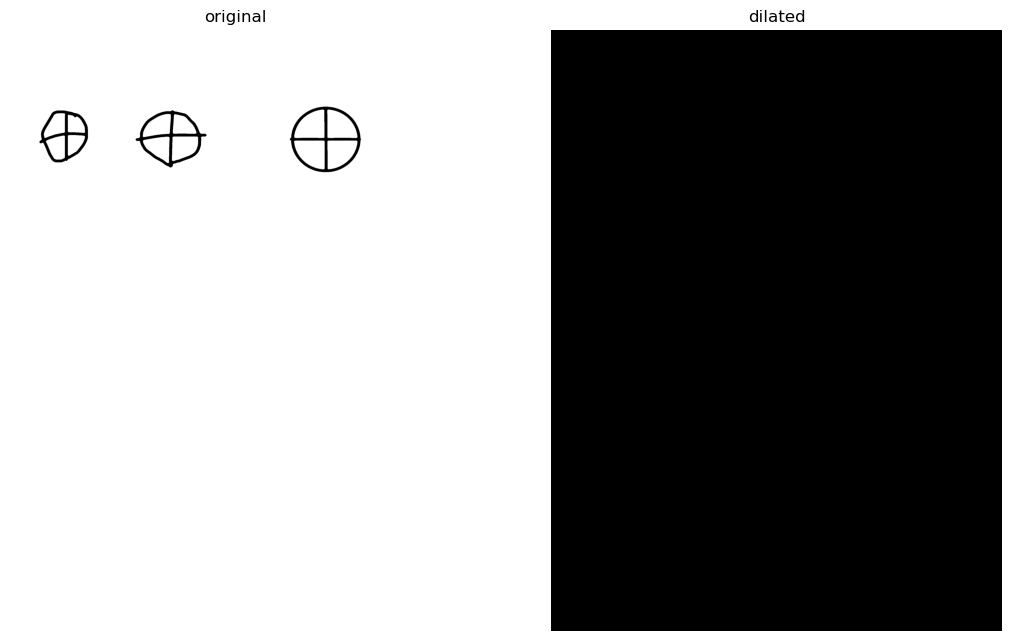

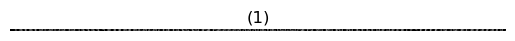

['xor' '=' 'xor']
xor 


[None]

In [119]:
image = cv2.imread("./test_images/xor.png")

solve_expression(image, is_table=False)




In [120]:
# show_images([table_tany(numbers)])